# Project 9 : 인물사진 만들기

### Shallow Focus 만들기

1. 배경이 있는 사진을 준비합니다.
2. Semantic Segmentation으로 피사체와 배경을 분리합니다.
3. blurring 기술로 배경을 흐리게 합니다.
4. 피사체를 배경의 원래 위치에 합성합니다.

#### 사진 준비

* os : operating system, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있습니다.
* urllib : URL 작업을 위한 여러 모듈을 모든 패키지
* cv2 : OpenCV 라이브러리, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
* numpy : 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리, 데이터 구조 이외에도 수치계산을 위해 효율적으로 구현된 기능을 제공하는 라이브러리
* pixellib : 이미지 및 비디오 segmentation 기법중, sementic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리

In [1]:
import os
import urllib
import cv2 
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(1411, 1058, 3)


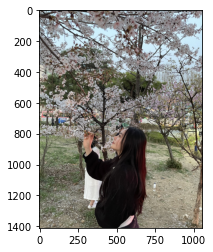

In [2]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장

img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image3.png'  
img_orig = cv2.imread(img_path)

print(img_orig.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()


#### 세그멘테이션으로 사람 분리하기

* 포토샵으로 흔히 말하는 '누끼따기'
* image segmentation : 이미지에서 픽셀 단위로 관심 객체를 추출하는 방법. 모든 픽셀에 label을 할당하고, 라벨이 같은 객체들은 공통적인 특징을 가진다고 가정합니다.

* semantic segmentation : 세그멘테이션 중에서도 특히 우리가 인식하는 세계처럼 물리적 의미 단위로 인식하는 세그멘테이션. 이미지에서 픽셀을 사람, 자동ㅊ, 비행기 등의 물리적 단위로 분류하는 방법


#### 시멘틱 세그멘테이션 다루기
* DeepLab이라는 세그멘테이션 모델 이용

In [3]:
# os.getenv(x)함수는 환경변수 x의 값을 포함하는 문자열 변수를 반환합니다
# model_dir에 "/aiffel/human_segmentation/models" 저장
# os.path.join(a,b)는 경로를 병합하여 새 경로를 생성
# model_file에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fdc76feb700>)

In [4]:
# PixelLib 라이브러리에서 가져온 클래스를 가져와서 semantic_segmentation을 수행하는 클래스 인스턴스를 만듬
model = semantic_segmentation()

# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
model.load_pascalvoc_model(model_file)


In [5]:
# segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
segvalues, output = model.segmentAsPascalvoc(img_path)

In [6]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

* person label, 15를 가진 영역만 검출합니다.

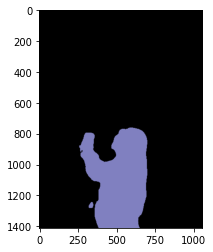

In [7]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [8]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [9]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [10]:
# 컬러맵 만들기

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

In [12]:
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(1411, 1058)


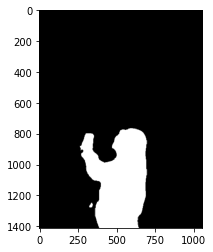

In [13]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)
# seg_color 값이 person 값이므로 사람이 있는 위치를 제외하고 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

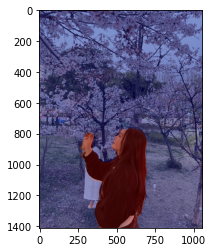

In [14]:
# 원본 이미지를 img_show에 할당한 뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask를 만둔 뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True, False 값을 각각 255와 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿉니다.
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스크를 적당히 합칩니다.
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

####  배경흐리게 하기

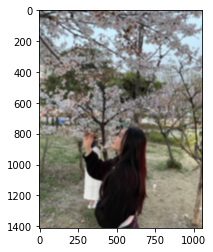

In [15]:
# (13,13)은 blurring kernel size를 뜻합니다
img_orig_blur = cv2.blur(img_orig, (13, 13))

# plt.imshow() : 저장된 데이터를 이미지의 형식으로 표시
# cv2.cvtColor(입력이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

흐려진 이미지에서 세그멘테이션 마스크를 이용해 배경만 추출합니다.

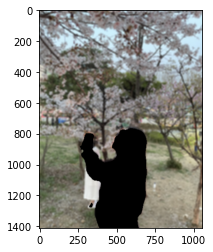

In [16]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not() : 이미지 반전. 배경이 0 사람이 255였지만 연산후 배경이 255 사람은 0
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and() : 배경만 있는 영상을 얻을 수 있음
# 0 과 어떤 수를 bitwise_and 연산을 해도 0이 되므로
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 사람이 사라지고 배경만!

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

#### 흐린 배경과 원본 영상 합성

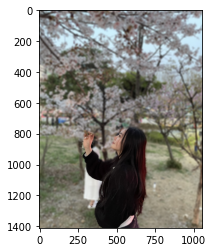

In [17]:
# np.where(조건, 참일때, 거짓일때)
# segmentation 마스크가 255인 부분만 원본 이미지 값을 가져오고 아닌 영역은 블러된 이미지 사용
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

#### 처리후 image 비교

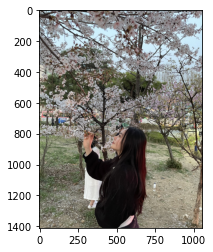 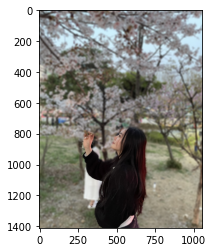

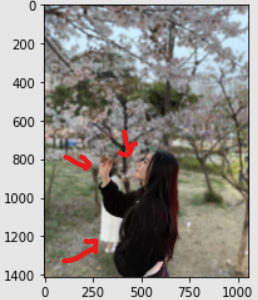

* 코부분과 손부분을 정확히 인식하지 못했습니다.
* 뒷 사람은 발만 인식되었습니다!!

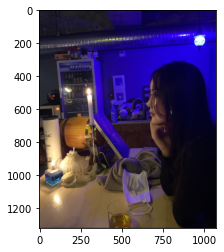

(1319, 1070, 3)


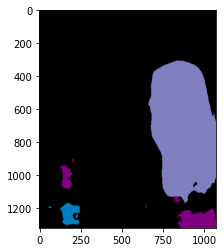

background
bottle
diningtable
person
(1319, 1070)


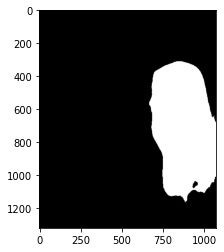

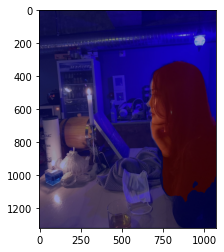

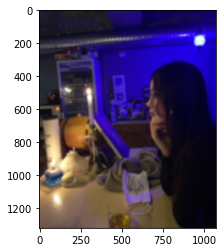

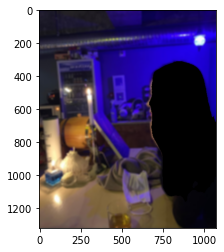

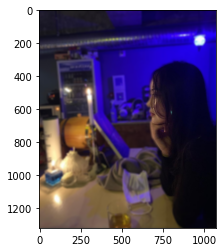

In [18]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image4.png'  
img_orig = cv2.imread(img_path)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

# PixelLib 라이브러리에서 가져온 클래스를 가져와서 semantic_segmentation을 수행하는 클래스 인스턴스를 만듬
model = semantic_segmentation()

# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
model.load_pascalvoc_model(model_file)

print(img_orig.shape)
segvalues, output = model.segmentAsPascalvoc(img_path)
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])
    
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

# 원본 이미지를 img_show에 할당한 뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask를 만둔 뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True, False 값을 각각 255와 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿉니다.
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스크를 적당히 합칩니다.
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()
# (13,13)은 blurring kernel size를 뜻합니다
img_orig_blur = cv2.blur(img_orig, (13, 13))

# plt.imshow() : 저장된 데이터를 이미지의 형식으로 표시
# cv2.cvtColor(입력이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not() : 이미지 반전. 배경이 0 사람이 255였지만 연산후 배경이 255 사람은 0
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and() : 배경만 있는 영상을 얻을 수 있음
# 0 과 어떤 수를 bitwise_and 연산을 해도 0이 되므로
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 사람이 사라지고 배경만!

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()
# np.where(조건, 참일때, 거짓일때)
# segmentation 마스크가 255인 부분만 원본 이미지 값을 가져오고 아닌 영역은 블러된 이미지 사용
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

#### 문제점
자꾸 코를 인식 못합니다!!
그리고 bottle이 아니라 양초입니다!

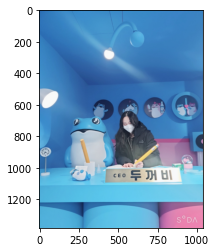

(1382, 1037, 3)


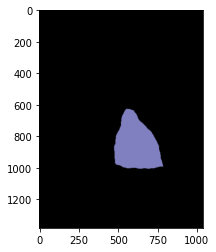

background
person
(1382, 1037)


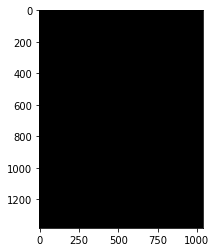

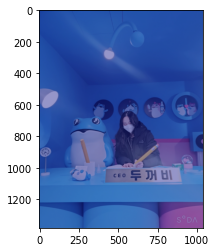

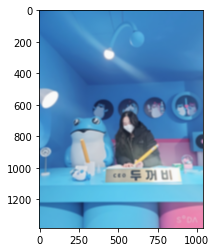

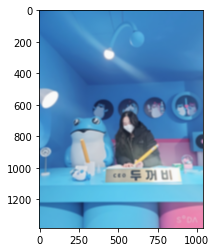

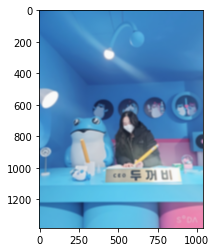

In [28]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image6.png'  
img_orig = cv2.imread(img_path)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

# PixelLib 라이브러리에서 가져온 클래스를 가져와서 semantic_segmentation을 수행하는 클래스 인스턴스를 만듬
model = semantic_segmentation()

# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
model.load_pascalvoc_model(model_file)

print(img_orig.shape)
segvalues, output = model.segmentAsPascalvoc(img_path)
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])
    
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

# 원본 이미지를 img_show에 할당한 뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask를 만둔 뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True, False 값을 각각 255와 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿉니다.
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스크를 적당히 합칩니다.
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()
# (13,13)은 blurring kernel size를 뜻합니다
img_orig_blur = cv2.blur(img_orig, (13, 13))

# plt.imshow() : 저장된 데이터를 이미지의 형식으로 표시
# cv2.cvtColor(입력이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not() : 이미지 반전. 배경이 0 사람이 255였지만 연산후 배경이 255 사람은 0
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and() : 배경만 있는 영상을 얻을 수 있음
# 0 과 어떤 수를 bitwise_and 연산을 해도 0이 되므로
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 사람이 사라지고 배경만!

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()
# np.where(조건, 참일때, 거짓일때)
# segmentation 마스크가 255인 부분만 원본 이미지 값을 가져오고 아닌 영역은 블러된 이미지 사용
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

#### 문제점
* 사람이 아닌 대왕연필을 인식하지 못했습니다.

### 고양이 사진 만들기

* cat label, 8번에 해당합니다

In [20]:
colormap[8]

array([64,  0,  0])

In [21]:
seg_color = (0,0,64) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

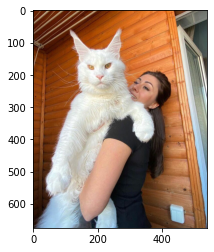

(675, 540, 3)


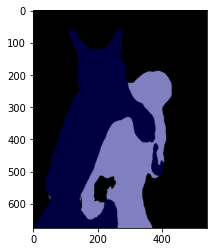

background
cat
person
(675, 540)


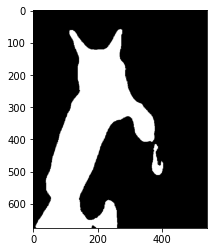

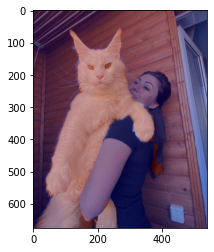

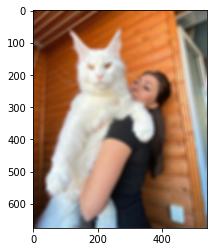

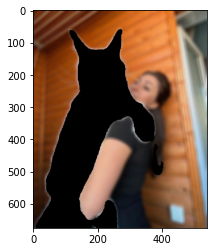

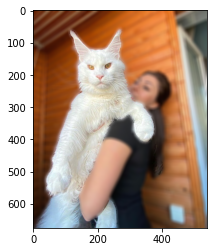

In [22]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat.png'  
img_orig = cv2.imread(img_path)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

# PixelLib 라이브러리에서 가져온 클래스를 가져와서 semantic_segmentation을 수행하는 클래스 인스턴스를 만듬
model = semantic_segmentation()

# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
model.load_pascalvoc_model(model_file)

print(img_orig.shape)
segvalues, output = model.segmentAsPascalvoc(img_path)
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])
    
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

# 원본 이미지를 img_show에 할당한 뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask를 만둔 뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True, False 값을 각각 255와 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿉니다.
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스크를 적당히 합칩니다.
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()
# (13,13)은 blurring kernel size를 뜻합니다
img_orig_blur = cv2.blur(img_orig, (13, 13))

# plt.imshow() : 저장된 데이터를 이미지의 형식으로 표시
# cv2.cvtColor(입력이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not() : 이미지 반전. 배경이 0 사람이 255였지만 연산후 배경이 255 사람은 0
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and() : 배경만 있는 영상을 얻을 수 있음
# 0 과 어떤 수를 bitwise_and 연산을 해도 0이 되므로
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 사람이 사라지고 배경만!

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()
# np.where(조건, 참일때, 거짓일때)
# segmentation 마스크가 255인 부분만 원본 이미지 값을 가져오고 아닌 영역은 블러된 이미지 사용
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

#### 문제점
* 고양이 발이 좀 흐릿합니다.
* 고양이 털도 블러 처리가 된 것 같습니다.
* 고양이 왼쪽 발 밑에 고양이가 아닌것까지 고양이로 처리되었습니다.

### 크로마키만들기

* background의 배경은 label 1

In [23]:
colormap[1]

array([128,   0,   0])

In [24]:
seg_color = (0,0,64) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(675, 540)


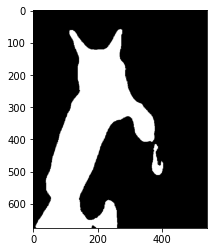

In [25]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)
# seg_color 값이 person 값이므로 사람이 있는 위치를 제외하고 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

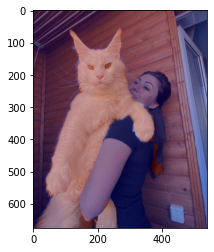

In [26]:
# 원본 이미지를 img_show에 할당한 뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask를 만둔 뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True, False 값을 각각 255와 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿉니다.
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스크를 적당히 합칩니다.
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

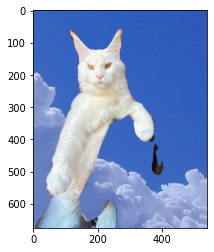

In [27]:

backg_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/sky2.png'  
backg_orig = cv2.imread(backg_path)
# np.where(조건, 참일때, 거짓일때)
# segmentation 마스크가 255인 부분만 원본 이미지 값을 가져오고 아닌 영역은 background 이미지 값을 가져옵니다.
img_concat = np.where(img_mask_color==255, img_orig, backg_orig)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 문제점 개선

* 인물사진, 고양이 사진, 크로마키 사진 만들기 작업을 했을 때 나름대로 좋은 성능을 보였지만, 주로 테두리 부분, 손과 코, 귀, 고양이의 털 과 같이 세밀한 부분은 잡아내지 못한 것 같습니다.
* 사람이 아닌데 사람으로 인식하거나, 고양이가 아닌데 고양이로 인식한 부분이 일부 있었습니다.

* 이런 문제들을 완화하기 위해 대부분의 segmentation model들은 Downsampling & Upsampling 형태를 가지고 있습니다. Downsampling은 차원을 줄여서 적은 메모리로 깊은 convolution을 할 수 있게 하는 것입니다.마지막에 fully-connected-layer를 넣지 않고 fully connected network를 주로 사용합니다. 그리고 upsampling은 downsampling을 통해서 받은 결과의 차원을 늘려서 input과 같은 차원으로 만들어 주는 과정입니다.
* 이러한 Image Segmentation에 AI를 적용하여 성능을 개선 시킬 수 있습니다. 기울기 기반 필터링으로 기울기의 변화를 이용해서 폴리곤의 점의 개수를 줄이는 것입니다. 그리고 비율 기반 필터링으로 객체 사이즈와 곡률을 고려하여 점의 개수를 직접적으로 줄여줍니다.

### 회고

* 사진을 찍을 때 자동으로 인물사진 모드로 바뀌면 피사체는 선명하게, 배경은 흐릿하게 만들었는데, 이렇게 배경과 피사체를 분리하고 배경을 블러처리해서 합성하는 방식으로도 만들 수 있다는 것이 신기했습니다. 직접 본인의 사진과, 고양이 사진, 크로마키 사진들을 만들어 보니 재미있었습니다.
* CV는 재밌습니다!!